### 파이썬 Native XGBoost 적용 - 위스콘신 Breast Cancer 데이터 셋

#### 데이터 세트 로딩하기

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

#xgboost 패키지 로딩 
import xgboost as xgb
from xgboost import plot_importance

import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
feature = dataset.data
labels = dataset.target

cancer_df = pd.DataFrame(feature,columns=dataset.feature_names)
cancer_df['target'] = labels
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [2]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [4]:
# cancer_df에서 feature용 DataFrame과 Label용 Series 객체 추출
# 맨 마지막 칼럼이 Label이므로 feature용 DataFrame은 cancer_df의 첫번째 칼럼에서 맨 마지막 두번째 컬럼까지 :-1슬라이싱으로 추출
X_features = cancer_df.iloc[:,:-1]
y_label = cancer_df.iloc[:,-1]

# 전체 데이터 중 80%는 학습용 20% 테스트용 데이터 추출
X_train,X_test,y_train,y_test = train_test_split(X_features,y_label,test_size=0.2)
# 위에서 만든 X_train,y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr,X_val,y_tr,y_val = train_test_split(X_train,y_train,test_size=0.1)

print(X_train.shape,X_test.shape)
print(X_tr.shape,X_val.shape)

(455, 30) (114, 30)
(409, 30) (46, 30)


#### 학습과검증 예측 데이터 세트를 DMatrix로 변환
+ DMatrix는 넘파이 array,DataFrame에서도 변환 가능

In [5]:
# 만약 구버전 XGBoost에서 DataFrame으로 DMatrix 생성이 안될 경우 X_train.value로 넘파이 변환
# 학습,검증,테스트용 DMatrix를 생성.

dtr=xgb.DMatrix(data=X_tr,label=y_tr)
dval=xgb.DMatrix(data=X_val,label=y_val)
dtest=xgb.DMatrix(data=X_test,label=y_test)

In [6]:
params = { 'max_depth':3,
           'eta': 0.05,
           'objective':'binary:logistic',
           'eval_metric':'logloss'
        }
num_rounds = 400

#### 주어진 하이퍼 파라미터와 early stopping파라미터를 train() 함수의 파라미터로 전달하고 학습

In [7]:
# 학습 데이터 셋은 'train' 또는 평가 데이터 셋은 'eval' 로 명기합니다. 
eval_list = [(dtr,'train'),(dval,'eval')] # 또는 eval_list = [(dval,'eval')] 만 명기해도 무방. 

# 하이퍼 파라미터와 early stopping 파라미터를 train( ) 함수의 파라미터로 전달
xgb_model = xgb.train(params = params , dtrain=dtr , num_boost_round=num_rounds , \
                      early_stopping_rounds=50, evals=eval_list )

[0]	train-logloss:0.64985	eval-logloss:0.65737
[1]	train-logloss:0.61053	eval-logloss:0.62545
[2]	train-logloss:0.57468	eval-logloss:0.59641
[3]	train-logloss:0.54185	eval-logloss:0.57139
[4]	train-logloss:0.51169	eval-logloss:0.54746
[5]	train-logloss:0.48391	eval-logloss:0.52691
[6]	train-logloss:0.45825	eval-logloss:0.50700
[7]	train-logloss:0.43451	eval-logloss:0.48981
[8]	train-logloss:0.41249	eval-logloss:0.47332
[9]	train-logloss:0.39204	eval-logloss:0.45902
[10]	train-logloss:0.37194	eval-logloss:0.44157
[11]	train-logloss:0.35322	eval-logloss:0.42434
[12]	train-logloss:0.33576	eval-logloss:0.40929
[13]	train-logloss:0.31946	eval-logloss:0.39426
[14]	train-logloss:0.30423	eval-logloss:0.38122
[15]	train-logloss:0.28997	eval-logloss:0.36806
[16]	train-logloss:0.27673	eval-logloss:0.35907
[17]	train-logloss:0.26409	eval-logloss:0.34780
[18]	train-logloss:0.25225	eval-logloss:0.33680
[19]	train-logloss:0.24107	eval-logloss:0.32784
[20]	train-logloss:0.23060	eval-logloss:0.31887
[2

[170]	train-logloss:0.01289	eval-logloss:0.13155
[171]	train-logloss:0.01281	eval-logloss:0.13175
[172]	train-logloss:0.01274	eval-logloss:0.13184
[173]	train-logloss:0.01267	eval-logloss:0.13183
[174]	train-logloss:0.01257	eval-logloss:0.13209
[175]	train-logloss:0.01248	eval-logloss:0.13229
[176]	train-logloss:0.01241	eval-logloss:0.13199
[177]	train-logloss:0.01234	eval-logloss:0.13215
[178]	train-logloss:0.01229	eval-logloss:0.13231
[179]	train-logloss:0.01222	eval-logloss:0.13228
[180]	train-logloss:0.01214	eval-logloss:0.13229
[181]	train-logloss:0.01209	eval-logloss:0.13245
[182]	train-logloss:0.01203	eval-logloss:0.13263
[183]	train-logloss:0.01197	eval-logloss:0.13235
[184]	train-logloss:0.01191	eval-logloss:0.13247
[185]	train-logloss:0.01184	eval-logloss:0.13213
[186]	train-logloss:0.01179	eval-logloss:0.13229
[187]	train-logloss:0.01173	eval-logloss:0.13198
[188]	train-logloss:0.01168	eval-logloss:0.13171
[189]	train-logloss:0.01163	eval-logloss:0.13212
[190]	train-logloss:

### predict()를 통해 예측 확률값을 반환하고 예측값으로 변환

In [8]:
pred_probs = xgb_model.predict(dtest)
print('predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5 보다 크면 1 , 그렇지 않으면 0 으로 예측값 결정하여 List 객체인 preds에 저장 
preds = [ 1 if x > 0.5 else 0 for x in pred_probs ]
print('예측값 10개만 표시:',preds[:10])

predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.15  0.998 0.997 0.011 0.907 0.754 0.001 0.994 0.999 0.099]
예측값 10개만 표시: [0, 1, 1, 0, 1, 1, 0, 1, 1, 0]


In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [10]:
get_clf_eval(y_test , preds, pred_probs)

오차 행렬
[[34  2]
 [ 3 75]]
정확도: 0.9561, 정밀도: 0.9740, 재현율: 0.9615,    F1: 0.9677, AUC:0.9786


#### Feature Importance 시각화

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

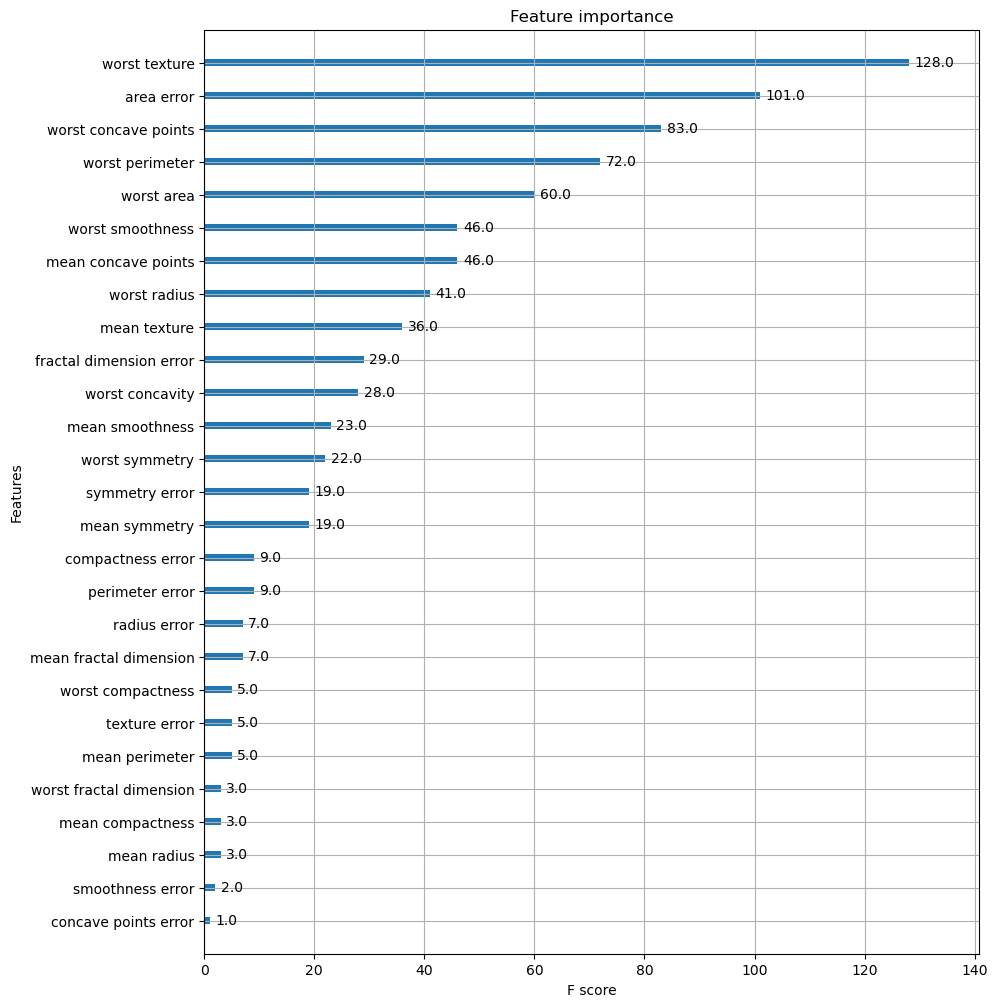

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)

###  사이킷런 Wrapper XGBoost 개요 및 적용


#### 사이킷런 래퍼 클래스 임포트, 학습 및 예측

In [13]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

# Warning 메시지를 없애기 위해 eval_metric 값을 XGBClassifier 생성 인자로 입력. 미 입력 해도 수행에 문제 없음
xgb_wrapper = XGBClassifier(n_estimators =400,learning_rate = 0.05,max_depth = 3,eval_metric='logloss')
xgb_wrapper.fit(X_train,y_train)
w_preds = xgb_wrapper.predict(X_test)
w_preds_proba = xgb_wrapper.predict_proba(X_test)[:,1]

In [14]:
get_clf_eval(y_test,w_preds,w_preds_proba)

오차 행렬
[[33  3]
 [ 3 75]]
정확도: 0.9474, 정밀도: 0.9615, 재현율: 0.9615,    F1: 0.9615, AUC:0.9850


#### early stopping을 50으로 설정하고 재학습/예측/평가

In [15]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400,learning_rate=0.05,max_depth=3)
evals = [(X_tr,y_tr),(X_val,y_val)]
xgb_wrapper.fit(X_tr,y_tr,early_stopping_rounds=50,eval_metric="logloss",eval_set=evals,verbose=True)

wa50_preds = xgb_wrapper.predict(X_test)
wa50_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.64985	validation_1-logloss:0.65737
[1]	validation_0-logloss:0.61053	validation_1-logloss:0.62545
[2]	validation_0-logloss:0.57468	validation_1-logloss:0.59641
[3]	validation_0-logloss:0.54185	validation_1-logloss:0.57139
[4]	validation_0-logloss:0.51169	validation_1-logloss:0.54746
[5]	validation_0-logloss:0.48391	validation_1-logloss:0.52691
[6]	validation_0-logloss:0.45825	validation_1-logloss:0.50700
[7]	validation_0-logloss:0.43451	validation_1-logloss:0.48981
[8]	validation_0-logloss:0.41249	validation_1-logloss:0.47332
[9]	validation_0-logloss:0.39204	validation_1-logloss:0.45902
[10]	validation_0-logloss:0.37194	validation_1-logloss:0.44157
[11]	validation_0-logloss:0.35322	validation_1-logloss:0.42434
[12]	validation_0-logloss:0.33576	validation_1-logloss:0.40929
[13]	validation_0-logloss:0.31946	validation_1-logloss:0.39426
[14]	validation_0-logloss:0.30423	validation_1-logloss:0.38122
[15]	validation_0-logloss:0.28997	validation_1-logloss:0.36806
[1

[130]	validation_0-logloss:0.01807	validation_1-logloss:0.13694
[131]	validation_0-logloss:0.01785	validation_1-logloss:0.13673
[132]	validation_0-logloss:0.01766	validation_1-logloss:0.13684
[133]	validation_0-logloss:0.01752	validation_1-logloss:0.13681
[134]	validation_0-logloss:0.01735	validation_1-logloss:0.13608
[135]	validation_0-logloss:0.01712	validation_1-logloss:0.13602
[136]	validation_0-logloss:0.01698	validation_1-logloss:0.13497
[137]	validation_0-logloss:0.01678	validation_1-logloss:0.13458
[138]	validation_0-logloss:0.01666	validation_1-logloss:0.13454
[139]	validation_0-logloss:0.01651	validation_1-logloss:0.13456
[140]	validation_0-logloss:0.01636	validation_1-logloss:0.13469
[141]	validation_0-logloss:0.01623	validation_1-logloss:0.13369
[142]	validation_0-logloss:0.01609	validation_1-logloss:0.13345
[143]	validation_0-logloss:0.01592	validation_1-logloss:0.13333
[144]	validation_0-logloss:0.01574	validation_1-logloss:0.13325
[145]	validation_0-logloss:0.01561	valid

In [16]:
get_clf_eval(y_test,wa50_preds,wa50_pred_proba)

오차 행렬
[[34  2]
 [ 3 75]]
정확도: 0.9561, 정밀도: 0.9740, 재현율: 0.9615,    F1: 0.9677, AUC:0.9783


#### early stopping을 10으로 설정하고 재학습/예측/평가

In [18]:
# early_stopping_rounds를 10으로 설정하고 재 학습. 
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds=10, 
                eval_metric="logloss", eval_set=evals,verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]
get_clf_eval(y_test , ws10_preds, ws10_pred_proba)

[0]	validation_0-logloss:0.64985	validation_1-logloss:0.65737
[1]	validation_0-logloss:0.61053	validation_1-logloss:0.62545
[2]	validation_0-logloss:0.57468	validation_1-logloss:0.59641
[3]	validation_0-logloss:0.54185	validation_1-logloss:0.57139
[4]	validation_0-logloss:0.51169	validation_1-logloss:0.54746
[5]	validation_0-logloss:0.48391	validation_1-logloss:0.52691
[6]	validation_0-logloss:0.45825	validation_1-logloss:0.50700
[7]	validation_0-logloss:0.43451	validation_1-logloss:0.48981
[8]	validation_0-logloss:0.41249	validation_1-logloss:0.47332
[9]	validation_0-logloss:0.39204	validation_1-logloss:0.45902
[10]	validation_0-logloss:0.37194	validation_1-logloss:0.44157
[11]	validation_0-logloss:0.35322	validation_1-logloss:0.42434
[12]	validation_0-logloss:0.33576	validation_1-logloss:0.40929
[13]	validation_0-logloss:0.31946	validation_1-logloss:0.39426
[14]	validation_0-logloss:0.30423	validation_1-logloss:0.38122
[15]	validation_0-logloss:0.28997	validation_1-logloss:0.36806
[1

[130]	validation_0-logloss:0.01807	validation_1-logloss:0.13694
[131]	validation_0-logloss:0.01785	validation_1-logloss:0.13673
[132]	validation_0-logloss:0.01766	validation_1-logloss:0.13684
[133]	validation_0-logloss:0.01752	validation_1-logloss:0.13681
[134]	validation_0-logloss:0.01735	validation_1-logloss:0.13608
[135]	validation_0-logloss:0.01712	validation_1-logloss:0.13602
[136]	validation_0-logloss:0.01698	validation_1-logloss:0.13497
[137]	validation_0-logloss:0.01678	validation_1-logloss:0.13458
[138]	validation_0-logloss:0.01666	validation_1-logloss:0.13454
[139]	validation_0-logloss:0.01651	validation_1-logloss:0.13456
[140]	validation_0-logloss:0.01636	validation_1-logloss:0.13469
[141]	validation_0-logloss:0.01623	validation_1-logloss:0.13369
[142]	validation_0-logloss:0.01609	validation_1-logloss:0.13345
[143]	validation_0-logloss:0.01592	validation_1-logloss:0.13333
[144]	validation_0-logloss:0.01574	validation_1-logloss:0.13325
[145]	validation_0-logloss:0.01561	valid

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

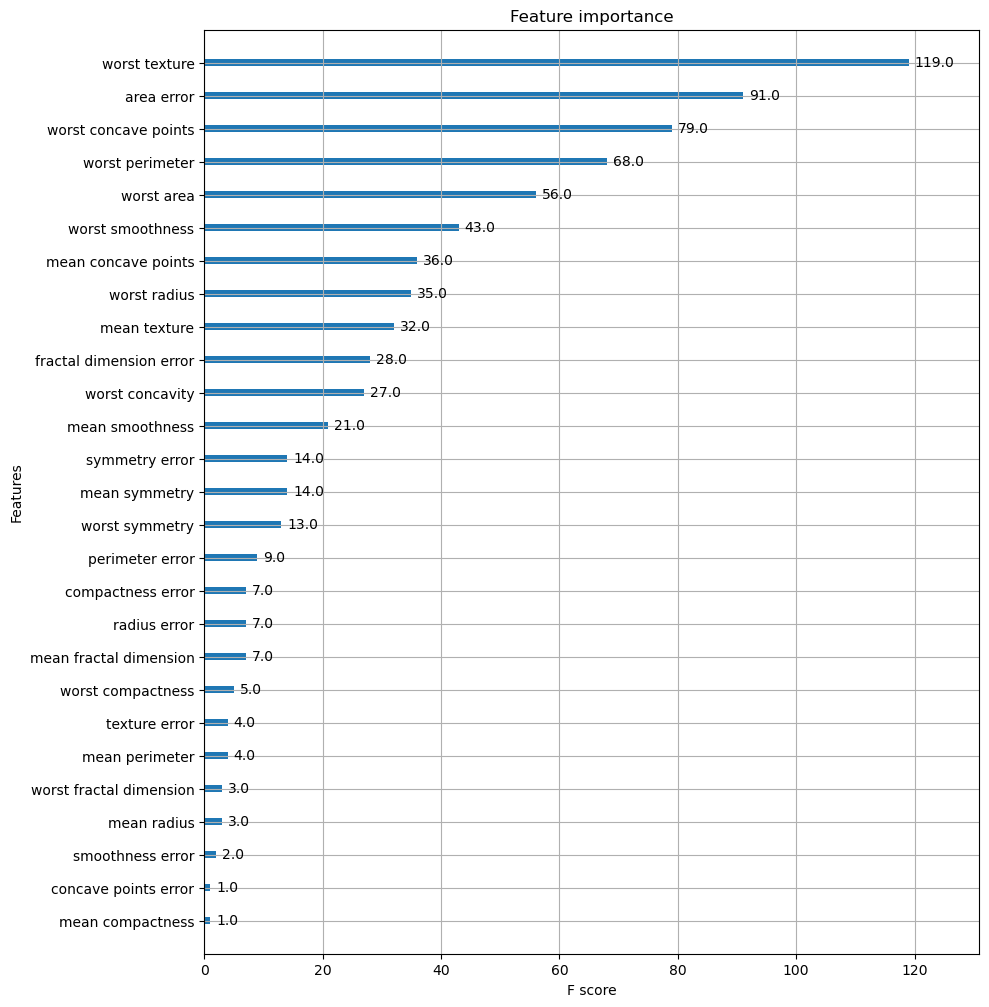

In [19]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
# 사이킷런 래퍼 클래스를 입력해도 무방. 
plot_importance(xgb_wrapper, ax=ax)